# Creating a new csv with derailment counts per state

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv("assets/railroad_data.csv", usecols = ['Accident Type','State Abbreviation', 'Date'])
df

,Date,Accident Type,State Abbreviation
0,06/06/2017,Derailment,IL
1,06/06/2017,Derailment,IL
2,04/06/1981,Side collision,NY
3,01/11/2007,Derailment,LA
4,10/07/2017,Hwy-rail crossing,IL
...,...,...,...
215844,06/21/2017,Raking collision,IL
215845,12/13/2016,Derailment,IL
215846,12/13/2016,Derailment,IL
215847,02/01/2017,Derailment,IL


In [3]:
df.dropna(inplace=True)

In [4]:
df = df[df["Accident Type"].str.contains('Derailment')]

In [5]:
pd.set_option('mode.chained_assignment', None)
df.drop(['Accident Type'], axis=1, inplace= True)

In [6]:
df = df.rename(columns={'State Abbreviation': 'State'})
df

,Date,State
0,06/06/2017,IL
1,06/06/2017,IL
3,01/11/2007,LA
5,10/15/2017,IL
8,03/30/2017,IL
...,...,...
215843,02/14/2017,IL
215845,12/13/2016,IL
215846,12/13/2016,IL
215847,02/01/2017,IL


In [7]:
df_counts = df.value_counts('State')

In [8]:
df2 = df_counts.to_frame().reset_index()
df.columns

Index(['Date', 'State'], dtype='object')

In [9]:
df2.rename(columns={0: 'Total Derailments'}, inplace=True)
df2.columns

Index(['State', 'Total Derailments'], dtype='object')

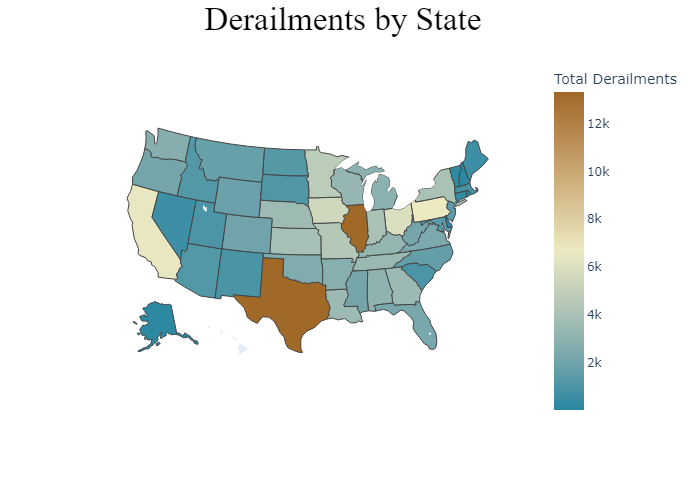

In [10]:
fig = px.choropleth(df2,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Total Derailments',
                    color_continuous_scale="earth_r", 
                    
                    )
fig.update_layout(
      title_text = 'Derailments by State',
      title_font_family="Times New Roman",
      title_font_size = 33,
      title_font_color="black", 
      title_x=0.49, 
         )
fig.show('png') #The 'png' is for making this fig static so it will show on github, 
                #if you don't want to run <pip install -U kaleido> then remove the 'png' 


In [11]:
df2.to_csv('rr_derailment_map.csv')